In [198]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelFile
import config
import numpy as np

In [199]:
Stlhomes_path = '/Users/nathanuelmartin/Downloads/UnoccupiedSTLHomes.csv'

In [200]:
House_df = pd.read_csv(Stlhomes_path)

In [201]:
House_df = House_df.dropna()
House_df

,Year Built,Neighborhoods,Years Vacant
0,1903.0,Old North St. Louis,8.0
1,1892.0,Old North St. Louis,1.0
2,1892.0,Old North St. Louis,5.0
3,1892.0,Old North St. Louis,4.0
4,1892.0,Old North St. Louis,8.0
...,...,...,...
5927,1892.0,Kingsway East,5.0
5928,1914.0,Penrose,8.0
5929,1906.0,Wells Goodfellow,8.0
5930,1892.0,Greater Ville,5.0


In [202]:
Neighborhoods_df = House_df.groupby(['Neighborhoods'])
Neighborhoods_df

In [203]:
Neighborhoods_df.describe()

Year Built                                                   \
                      count         mean        std     min      25%     50%   
Neighborhoods                                                                  
Academy               203.0  1898.320197   5.051315  1889.0  1894.00  1898.0   
Baden                 272.0  1921.683824  17.770452  1880.0  1907.00  1921.5   
Benton Park            25.0  1890.000000  11.276820  1870.0  1885.00  1890.0   
Benton Park West      120.0  1899.141667  11.861452  1875.0  1890.00  1896.5   
Bevo Mill              14.0  1919.928571  11.111078  1906.0  1911.75  1920.5   
...                     ...          ...        ...     ...      ...     ...   
Visitation Park         8.0  1906.250000  23.013971  1883.0  1895.75  1901.5   
Walnut Park East      362.0  1922.091160  17.538244  1896.0  1909.00  1921.0   
Walnut Park West      230.0  1928.165217  13.891614  1904.0  1922.00  1927.0   
Wells Goodfellow      502.0  1913.207171  15.212825  1884.0  1905.00  1909.0   
West End              147.0  1905.564626  13.706347  1882.0  1899.00  1905.0   

                                  Years Vacant                                 \
                      75%     max        count      mean       std  min   25%   
Neighborhoods                                                                   
Academy           1902.00  1920.0        203.0  8.605911  5.405568  0.0  5.00   
Baden             1932.50  1997.0        272.0  5.613971  4.832419  0.0  1.00   
Benton Park       1894.00  1928.0         25.0  4.640000  3.773592  0.0  2.00   
Benton Park West  1908.00  1936.0        120.0  5.841667  4.843771  1.0  2.00   
Bevo Mill         1925.00  1949.0         14.0  5.142857  3.347953  1.0  2.25   
...                   ...     ...          ...       ...       ...  ...   ...   
Visitation Park   1906.25  1960.0          8.0  9.500000  5.398412  0.0  6.50   
Walnut Park East  1926.00  2009.0        362.0  5.337017  4.961035  0.0  2.00   
Walnut Park West  1931.75  1962.0        230.0  6.617391  4.924908  0.0  3.00   
Wells Goodfellow  1921.00  2002.0        502.0  6.444223  5.310694  0.0  2.00   
West End          1907.50  1973.0        147.0  8.292517  6.672588  0.0  3.00   

                                     
                   50%    75%   max  
Neighborhoods                        
Academy            8.0  11.00  29.0  
Baden              4.0   9.00  21.0  
Benton Park        4.0   6.00  14.0  
Benton Park West   5.0   8.00  23.0  
Bevo Mill          4.5   7.75  11.0  
...                ...    ...   ...  
Visitation Park   10.5  13.00  17.0  
Walnut Park East   3.0   8.00  29.0  
Walnut Park West   5.0  10.00  25.0  
Wells Goodfellow   5.0   9.75  27.0  
West End           7.0  12.00  28.0  

[67 rows x 16 columns]

In [204]:
Neighborhoods_mean = Neighborhoods_df.mean()["Years Vacant"]
Neighborhoods_mean

Neighborhoods
Academy             8.605911
Baden               5.613971
Benton Park         4.640000
Benton Park West    5.841667
Bevo Mill           5.142857
                      ...   
Visitation Park     9.500000
Walnut Park East    5.337017
Walnut Park West    6.617391
Wells Goodfellow    6.444223
West End            8.292517
Name: Years Vacant, Length: 67, dtype: float64

In [205]:
Neighborhoods_means = Neighborhoods_df.mean()["Year Built"]
Neighborhoods_means

Neighborhoods
Academy             1898.320197
Baden               1921.683824
Benton Park         1890.000000
Benton Park West    1899.141667
Bevo Mill           1919.928571
                       ...     
Visitation Park     1906.250000
Walnut Park East    1922.091160
Walnut Park West    1928.165217
Wells Goodfellow    1913.207171
West End            1905.564626
Name: Year Built, Length: 67, dtype: float64

In [206]:
n_df = pd.DataFrame({"Mean Years Vacant": Neighborhoods_mean, "Mean Year Built": Neighborhoods_means })
n_df = n_df.reset_index()
n_df 

,Neighborhoods,Mean Years Vacant,Mean Year Built
0,Academy,8.605911,1898.320197
1,Baden,5.613971,1921.683824
2,Benton Park,4.640000,1890.000000
3,Benton Park West,5.841667,1899.141667
4,Bevo Mill,5.142857,1919.928571
...,...,...,...
62,Visitation Park,9.500000,1906.250000
63,Walnut Park East,5.337017,1922.091160
64,Walnut Park West,6.617391,1928.165217
65,Wells Goodfellow,6.444223,1913.207171


In [207]:
n_df = n_df.sort_values(["Mean Years Vacant"], ascending=False)
n_df

,Neighborhoods,Mean Years Vacant,Mean Year Built
39,Near North Riverfront,13.400000,1896.400000
51,Soulard,13.266667,1884.600000
44,Old North St. Louis,13.020833,1853.687500
26,Hyde Park,12.435407,1893.066986
42,North Riverfront,12.000000,1918.000000
...,...,...,...
10,Clayton-Tamm,2.666667,1909.333333
40,North Hampton,2.571429,1935.285714
25,Hi-Pointe,2.000000,1922.571429
58,Tiffany,1.500000,1910.000000


In [208]:
n_df_10 = n_df.iloc[[0,1,2,3,4,5,6,7,8,9,10],:]
n_df_10

,Neighborhoods,Mean Years Vacant,Mean Year Built
39,Near North Riverfront,13.400000,1896.400000
51,Soulard,13.266667,1884.600000
44,Old North St. Louis,13.020833,1853.687500
26,Hyde Park,12.435407,1893.066986
42,North Riverfront,12.000000,1918.000000
56,The Hill,12.000000,1906.000000
12,College Hill,10.569620,1897.962025
14,Covenant Blu-Grand Center,10.217391,1895.000000
46,Peabody Darst Webbe,10.142857,1894.714286
49,Shaw,10.000000,1911.000000


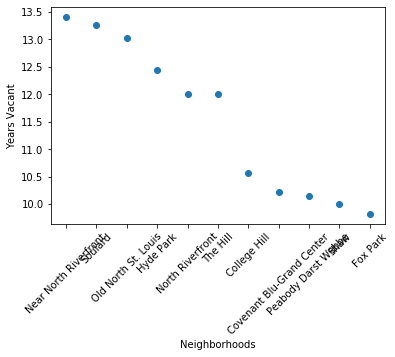

In [209]:
plt.xticks(rotation=55)
plt.scatter(n_df_10["Neighborhoods"], n_df_10["Mean Years Vacant"])
plt.xlabel("Neighborhoods")
plt.ylabel("Years Vacant")
plt.show()

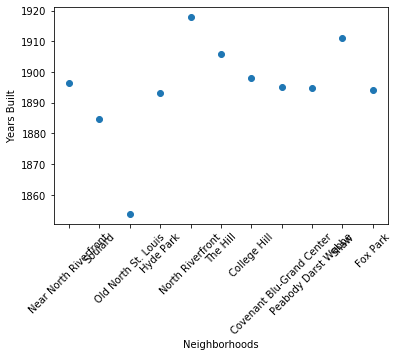

In [210]:
plt.xticks(rotation=55)
plt.scatter(n_df_10["Neighborhoods"], n_df_10["Mean Year Built"])
plt.xlabel("Neighborhoods")
plt.ylabel("Years Built")
plt.show()

In [103]:
fig.savefig('Neighborhoods_graph.png')

NameError: name 'fig' is not defined

In [ ]:
Neighborhoods_mean = Neighborhoods_df["Year Built"]["Years Vacant"].value_counts()
DrugCount.plot(kind="bar")
plt.show()